In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas import Series

## 1

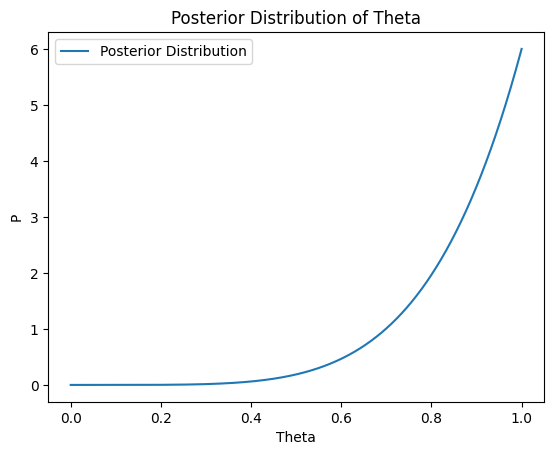

Theta의 기댓값: 0.8571428571428571


In [ ]:
# 관측된 데이터
successes = 5
trials = 5

# 사전 분포
prior_alpha = 1
prior_beta = 1

# 사후 분포
posterior_alpha = prior_alpha + successes
posterior_beta = prior_beta + trials - successes

# theta의 사후 분포를 베타 분포로 나타냄
posterior_distribution = stats.beta(posterior_alpha, posterior_beta)

# 사후 분포 시각화
x = np.linspace(0, 1, 1000)
plt.plot(x, posterior_distribution.pdf(x), label='Posterior Distribution')
plt.xlabel('Theta')
plt.ylabel('P')
plt.title('Posterior Distribution of Theta')
plt.legend()
plt.show()

print("Theta의 기댓값:", posterior_distribution.mean())

## 2

In [ ]:
data = [1, 2, -2, -1, 0, 0, 2, 2, 1, 2, 3]

# (a): 확률 행렬 P(up, flat, down)
P = np.array([[0.4, 0.4, 0.2], [0.5, 0.0, 0.5], [1.0, 0.0, 0.0]])

In [ ]:
def func(N):
    w = 1 # 오르내림 초기값: w=1
    X = [1] # 오르내림 담는 리스트 up=1, flat=2, down=3

    for _ in range(1, N):
        r = random.uniform(0, 1) # 랜덤 실수

        if w == 1: # 이번이 up일 때
            if r < 0.4: # 0~0.4의 실수가 나오면 다음은 up
                w = 1
            elif 0.4 <= r < 0.8: # 0.4~0.8의 실수가 나오면 다음은 flat
                w = 2
            else: # 0.8~1의 실수가 나오면 다음은 down
                w = 3

        elif w == 2: # 이번이 flat일 때
            if r < 0.5: # 0~0.5의 실수가 나오면 다음은 up
                w = 1
            else:  # 0.5~1의 실수가 나오면 다음은 down
                w = 3

        else: # 이번이 down일 때
            w = 1 # 다음은 up

        X.append(w)

    return X
func(10)

[1, 2, 3, 1, 3, 1, 1, 1, 1, 1]

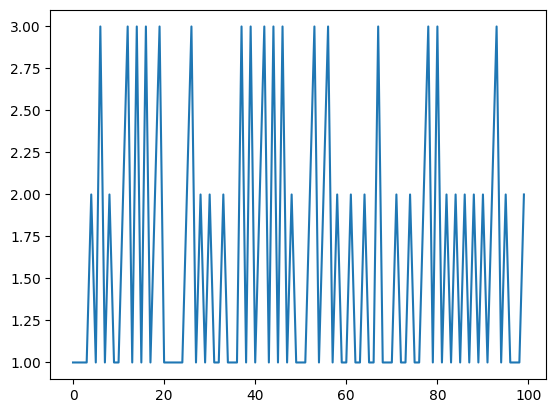

In [ ]:
plt.plot(func(100))

pi matrix: [[1.         0.         0.        ]
 [0.4        0.4        0.2       ]
 [0.56       0.16       0.28      ]
 [0.584      0.224      0.192     ]
 [0.5376     0.2336     0.2288    ]
 [0.56064    0.21504    0.22432   ]
 [0.556096   0.224256   0.219648  ]
 [0.5542144  0.2224384  0.2233472 ]
 [0.55625216 0.22168576 0.22206208]
 [0.55540582 0.22250086 0.22209331]
 [0.55550607 0.22216233 0.2223316 ]]
Up P: [1.0, 0.40051, 0.55863, 0.58132, 0.53876, 0.56017, 0.55645, 0.55229, 0.55658, 0.55466, 0.55608]
Flat P: [0.0, 0.40039, 0.16197, 0.22595, 0.23188, 0.21665, 0.22394, 0.22315, 0.22177, 0.22257, 0.22144]
Down P: [0.0, 0.1991, 0.2794, 0.19273, 0.22936, 0.22318, 0.21961, 0.22456, 0.22165, 0.22277, 0.22248]


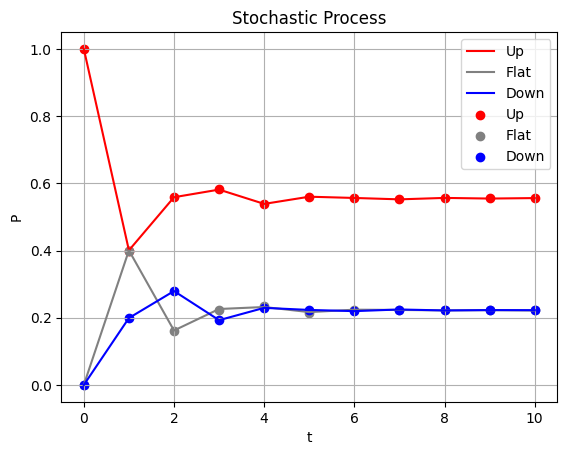

In [ ]:
# (b), (c)

def time10(T): # t=0~10까지 오르내림을 T번 구하여 행렬 형태로
    result = []
    for _ in range(T):
        result.append(np.array(func(11)))

    return np.array(result)

pi0 = np.array([1, 0, 0]) # pi(0) 벡터 지정
pi_matrix = np.zeros((11, len(pi0))) # 11행 3열짜리 0행렬

for i in range(0, 11):
    pi_matrix[i] = pi0 # 각 행에 pi(i) 저장
    pi0 = np.dot(pi0, P) # pi(i) = pi(i-1) x P

print('pi matrix:', pi_matrix)

U_list = []
F_list = []
D_list = []

ans = time10(100000) # T=100000

for i in range(0,11): # 각 시간마다의 U, F, D 갯수 counting
    U_list.append((list(ans[:,i]).count(1))/100000) # 10000으로 나누어 전체 합이 1이 되는 확률로
    F_list.append((list(ans[:,i]).count(2))/100000)
    D_list.append((list(ans[:,i]).count(3))/100000)

print('Up P:', U_list)
print('Flat P:', F_list)
print('Down P:', D_list)

t = list(range(11)) # t=0~10

plt.plot(t, U_list, color='red', label='Up')
plt.plot(t, F_list, color='gray', label='Flat')
plt.plot(t, D_list, color='blue', label='Down')
plt.scatter(t, list(pi_matrix[:,0]), color='red', label='Up')
plt.scatter(t, list(pi_matrix[:,1]), color='gray', label='Flat')
plt.scatter(t, list(pi_matrix[:,2]), color='blue', label='Down')

plt.xlabel('t')
plt.ylabel('P')
plt.title('Stochastic Process')
plt.legend()
plt.grid(True)
plt.show()

value: (1.0000000000000007+0j) vector: [-0.87038828+0.j -0.34815531+0.j -0.34815531+0.j]
value: (-0.29999999999999993+0.3316624790355401j) vector: [ 0.64549722+0.j         -0.38729833-0.42817442j -0.25819889+0.42817442j]
value: (-0.29999999999999993-0.3316624790355401j) vector: [ 0.64549722-0.j         -0.38729833+0.42817442j -0.25819889-0.42817442j]
v1 = (0.5555555555555557-0j)
v2 = (0.22222222222222213-0j)
v3 = (0.22222222222222227-0j)


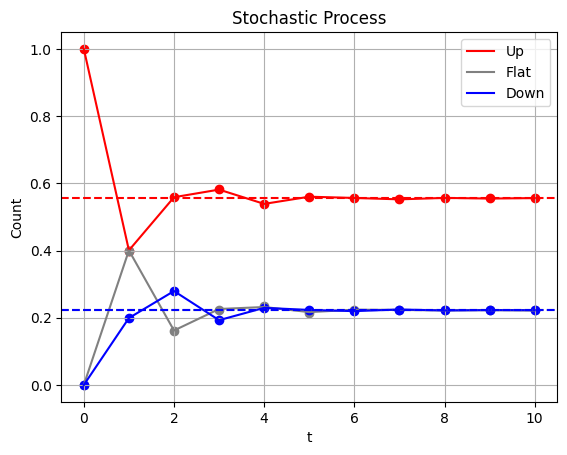

In [ ]:
# P의 전치 행렬로 고윳값, 고유벡터를 구함
value, vector = np.linalg.eig(np.transpose(P))

# 각 고윳값과 고유벡터(열벡터) 출력
for i in range(0,3):
    print('value:', value[i], 'vector:', vector[:,i])
V1 = vector[:,0]

# 확률과정 그래프와 같이 plot

vectors1 = V1/sum(V1) # normalized
for i in range(0,3):
    print(f'v{i+1} = {vectors1[i]}')

plt.plot(t, U_list, color='red', label='Up')
plt.plot(t, F_list, color='gray', label='Flat')
plt.plot(t, D_list, color='blue', label='Down')
plt.scatter(t, list(pi_matrix[:,0]), color='red')
plt.scatter(t, list(pi_matrix[:,1]), color='gray')
plt.scatter(t, list(pi_matrix[:,2]), color='blue')
plt.axhline(y=vectors1[0], color='red', linestyle='--')
plt.axhline(y=vectors1[1], color='gray', linestyle='--')
plt.axhline(y=vectors1[2], color='blue', linestyle='--')

plt.xlabel('t')
plt.ylabel('Count')
plt.title('Stochastic Process')
plt.legend()
plt.grid(True)
plt.show()

## 3

In [ ]:
def p3(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

def q3(x, z=5):
    if x >= z : return np.exp(-(x-z))
    else : return 0

x1 = 5

def func3(N):
    x_list = [x1] # accept 된 x가 담길 리스트
    x_current = x1 # x_1 = 5
    count = 0

    for _ in range(N):
        x_star = np.random.uniform(0, 1) # x* ~ N(0,1)
        a = p3(x_star)*q3(x_current, x_star)/p3(x_current)/q3(x_star, x_current) # acceptance 확률을 구하기 위한 변수
        acceptance_prob = min(1, a) # acceptance 확률 = min[1, {p(x*)p(x|x*)}/{p(x)/p(x*|x)}]
        if acceptance_prob == 1: # min값이 1일 때
            x_current = x_star # x*가 x값으로 accept 됨
            count += 1
        elif np.random.uniform(0,1) < acceptance_prob: # min값이 a이고 a가 r~U(0,1)보다 클 때
            x_current = x_star # x*가 x값으로 accept 됨
            count += 1
        elif np.random.uniform(0,1) >= acceptance_prob: # min값이 a이고 a가 r~U(0,1)보다 작거나 같을 때
            x_current = x_current # x*는 reject 되고 x는 이전 x를 그대로 accept
        x_list.append(x_current) # accpet 된 x를 x_list에 담음

    return count

print('X > z 일 확률:', func3(10000)/10000)

<ipython-input-48-6ade5d35545e>:17: RuntimeWarning: divide by zero encountered in scalar divide
  a = p(x_star)*q(x_current, x_star)/p(x_current)/q(x_star, x_current) # acceptance 확률을 구하기 위한 변수


X > z 일 확률: 0.0013


## 4

<ipython-input-54-e90b9fe1a241>:19: RuntimeWarning: divide by zero encountered in scalar divide
  a = p4(x_star) * q4(x_current, sigma) / (p4(x_current) * q4(x_star, sigma)) # acceptance 확률을 구하기 위한 변수
<ipython-input-54-e90b9fe1a241>:19: RuntimeWarning: invalid value encountered in scalar divide
  a = p4(x_star) * q4(x_current, sigma) / (p4(x_current) * q4(x_star, sigma)) # acceptance 확률을 구하기 위한 변수
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.

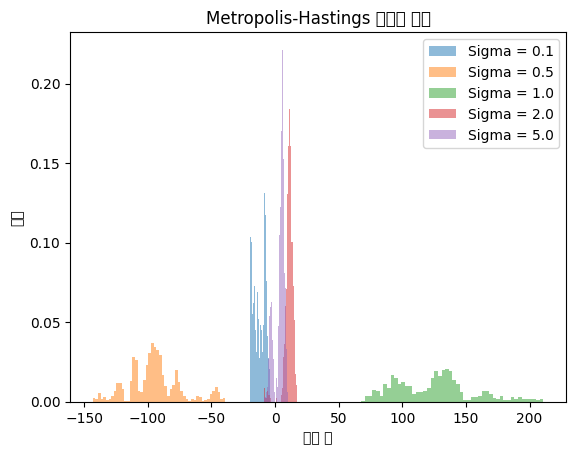

Sigma: 0.1, Acceptance Rate: 0.9001, Autocorrelation Time: 0.943897915567103
Sigma: 0.5, Acceptance Rate: 0.9001, Autocorrelation Time: 0.9326994977599274
Sigma: 1.0, Acceptance Rate: 0.9001, Autocorrelation Time: 0.6925680246348664
Sigma: 2.0, Acceptance Rate: 0.9001, Autocorrelation Time: 0.055594929475522026
Sigma: 5.0, Acceptance Rate: 0.9001, Autocorrelation Time: 0.004950153270911527


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 목표분포 p(x)
def p4(x):
    return 0.3*np.exp(-0.5*((x+3)/1.5)**2) + 0.7*np.exp(-0.5*((x-5)/1.5)**2)

# 제안분포 q(x) (정규분포)
def q4(x, sigma):
    return np.exp(-0.5*(x**2) / (sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

x1 = 0
def func4(target, proposal, sigma, N):
    x_list = [x1] # accept 된 x가 담길 리스트
    x_current = x1 # x_1 = 0

    for _ in range(N):
        x_star = x_current + np.random.normal(0, sigma)
        a = p4(x_star) * q4(x_current, sigma) / (p4(x_current) * q4(x_star, sigma)) # acceptance 확률을 구하기 위한 변수
        acceptance_prob = min(1, a) # acceptance 확률 = min[1, {p(x*)p(x|x*)}/{p(x)p(x*|x)}]
        if acceptance_prob == 1 or np.random.uniform(0, 1) < acceptance_prob: # acceptance 확률이 1이거나, acceptance 확률이 random 값보다 클 때
            x_current = x_star # x*가 x값으로 accept 됨
        x_list.append(x_current) # accpet 된 x를 x_list에 담음

    return x_list

# 메인 함수
def main(sigma_values):
    N = int(1e4) # 샘플 수
    burn_in = int(1e3) # 버닝 인
    thinning = 10 # 샘플링 간격

    acceptance_rates = []
    autocorrelation_times = []

    for sigma in sigma_values:
        # 메트로폴리스-헤이스팅스 알고리즘을 사용하여 표본 추출
        samples = func4(p4, q4, sigma, N)

        # 수락률 계산
        acceptance_rate = (len(samples) - burn_in) / N
        acceptance_rates.append(acceptance_rate)

        # 상관시간 계산
        autocorrelation_time = np.mean([np.corrcoef(samples[i:], samples[:-i])[0, 1] for i in range(1, N // 10)])
        autocorrelation_times.append(autocorrelation_time)

        # 샘플 플롯
        plt.hist(samples[burn_in::thinning], bins=50, density=True, alpha=0.5, label=f'Sigma = {sigma}')

    plt.title('Metropolis-Hastings 샘플링 결과')
    plt.xlabel('표본 값')
    plt.ylabel('밀도')
    plt.legend()
    plt.show()

    return acceptance_rates, autocorrelation_times

# 분산 값을 바꾸어가며 메인 함수 실행
sigma_values = [0.1, 0.5, 1.0, 2.0, 5.0]
acceptance_rates, autocorrelation_times = main(sigma_values)

# 결과 출력
for sigma, acceptance_rate, autocorrelation_time in zip(sigma_values, acceptance_rates, autocorrelation_times):
    print(f"Sigma: {sigma}, Acceptance Rate: {acceptance_rate}, Autocorrelation Time: {autocorrelation_time}")

sigma가 5.0, 분산이 25일 때 상관시간이 제일 작다.

### 1. ok 2. ok 3. 제안분포를 따르는 난수 생성해야 함. 4. 제안분포의 위치가 매번 바뀌어야 함.